In [1]:
import tensorflow as tf

import os
import pathlib
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

2023-12-20 10:32:23.445710: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
!nvidia-smi

Wed Dec 20 10:36:53 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off | 00000000:19:00.0 Off |                  N/A |
| 42%   81C    P2             226W / 250W |   6575MiB / 11264MiB |     54%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        # Restrict TensorFlow to only use the first GPU
        tf.config.set_visible_devices(gpus[1], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

2023-12-20 10:37:29.654510: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-12-20 10:37:29.662383: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-12-20 10:37:29.695856: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:19:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.75GiB deviceMemoryBandwidth: 573.69GiB/s
2023-12-20 10:37:29.696383: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:1a:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.75GiB deviceMemoryBandwidth: 573.69GiB/s
2023-12-20 10:37:29.696831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:67:0

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]
4 Physical GPUs, 1 Logical GPUs


dwidth: 573.69GiB/s
2023-12-20 10:37:29.697218: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 3 with properties: 
pciBusID: 0000:68:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.75GiB deviceMemoryBandwidth: 573.69GiB/s
2023-12-20 10:37:29.697677: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-12-20 10:37:29.963520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-12-20 10:37:29.963641: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-12-20 10:37:30.087478: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2023-12-20 10:37:30.203085: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully ope

shape of image a is: (256, 256, 4)
shape of image b is (256, 256, 4)


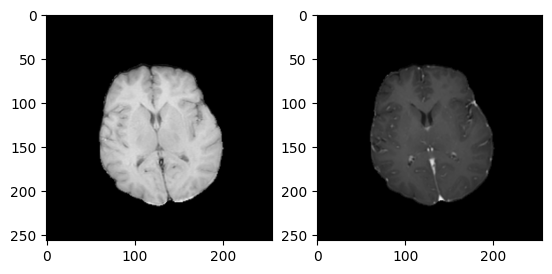

In [4]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import imageio

path_to_train_A = '/local/data0/home/nsha/Codes/Datamining/Brats dataset/trainA/'
path_to_train_B = '/local/data0/home/nsha/Codes/Datamining/Brats dataset/trainB/'

files = os.listdir(path_to_train_B)

for file in files:
    image_b = Image.open(path_to_train_B+file)
    image_b = np.array(image_b)

    image_a = Image.open(path_to_train_A+file.replace('t1n','t1c'))
    image_a = np.array(image_a)
    
    print('shape of image a is:',image_a.shape)
    print('shape of image b is',image_b.shape)
    
    plt.subplot(1,2,1)
    plt.imshow(image_b, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(image_a, cmap='gray')
    plt.show()
    break

    
# # Function to load and preprocess an image
# def load_image(file_path):
#     image = Image.open(file_path)
#     image = np.array(image)
#     # Add additional preprocessing if necessary, e.g., normalization
#     return image

# image = load_image(path_A)
# plt.imshow(image)

In [5]:
import os
import numpy as np
from PIL import Image

# Set paths
path_to_train_A = '/local/data0/home/nsha/Codes/Datamining/Brats dataset/trainA/'
path_to_train_B = '/local/data0/home/nsha/Codes/Datamining/Brats dataset/trainB/'


# Get the list of files in the directory
files_A = [f for f in os.listdir(path_to_train_A) if f.endswith('.png')]
files_B = [f for f in os.listdir(path_to_train_B) if f.endswith('.png')]

# Sort the lists to ensure the order matches
files_A.sort()
files_B.sort()

# Initialize datasets
dataset_A = []
dataset_B = []

# Iterate over the files and load images into the datasets
for file_A, file_B in zip(files_A, files_B):
    # Load image from path_to_train_A
    # print(file_A)
    # print(file_B)
    image_a = Image.open(os.path.join(path_to_train_A, file_A))
    image_a = np.array(image_a)
    dataset_A.append(image_a[:,:,0].astype('float32'))

    # Load corresponding image from path_to_train_B
    image_b = Image.open(os.path.join(path_to_train_B, file_B))
    image_b = np.array(image_b)
    dataset_B.append(image_b[:,:,0].astype('float32'))
    # plt.subplot(1,2,1)
    # plt.imshow(image_b)
    # plt.subplot(1,2,2)
    # plt.imshow(image_a)
    # plt.show()
    
# Convert datasets to numpy arrays
dataset_A = np.array(dataset_A)
dataset_B = np.array(dataset_B)


In [6]:
# Set paths
path_to_test_A = '/local/data0/home/nsha/Codes/Datamining/Brats dataset/testA/'
path_to_test_B = '/local/data0/home/nsha/Codes/Datamining/Brats dataset/testB/'


# Get the list of files in the directory
files_A_test = [f for f in os.listdir(path_to_test_A) if f.endswith('.png')]
files_B_test = [f for f in os.listdir(path_to_test_B) if f.endswith('.png')]

# Sort the lists to ensure the order matches
files_A_test.sort()
files_B_test.sort()

# Initialize datasets
dataset_test_A = []
dataset_test_B = []

# Iterate over the files and load images into the datasets
for file_test_A, file_test_B in zip(files_A_test, files_B_test):
    # Load image from path_to_train_A
    # print(file_A)
    # print(file_B)
    image_a = Image.open(os.path.join(path_to_test_A, file_test_A))
    image_a = np.array(image_a)
    dataset_test_A.append(image_a[:,:,0].astype('float32'))

    # Load corresponding image from path_to_train_B
    image_b = Image.open(os.path.join(path_to_test_B, file_test_B))
    image_b = np.array(image_b)
    dataset_test_B.append(image_b[:,:,0].astype('float32'))
    # plt.subplot(1,2,1)
    # plt.imshow(image_b)
    # plt.subplot(1,2,2)
    # plt.imshow(image_a)
    # plt.show()
    
# Convert datasets to numpy arrays
dataset_test_A = np.array(dataset_test_A)
dataset_test_B = np.array(dataset_test_B)


In [7]:
dataset_A.shape, dataset_B.shape,dataset_test_A.shape, dataset_test_B.shape

((1000, 256, 256), (1000, 256, 256), (251, 256, 256), (251, 256, 256))

In [8]:
paired_train_dataset = list(zip(dataset_A, dataset_B))
paired_test_dataset = list(zip(dataset_test_A, dataset_test_B))

In [9]:
paired_train_dataset = np.array(paired_train_dataset)
paired_train_dataset = (paired_train_dataset / 127.5) - 1

paired_test_dataset = np.array(paired_test_dataset)
paired_test_dataset = (paired_test_dataset / 127.5) - 1

paired_train_dataset.shape, paired_test_dataset.shape


((1000, 2, 256, 256), (251, 2, 256, 256))

In [10]:
!nvidia-smi

Wed Dec 20 10:38:00 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off | 00000000:19:00.0 Off |                  N/A |
| 42%   80C    P2             230W / 250W |   6575MiB / 11264MiB |     56%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
paired_dataset_train_shuffled = tf.data.Dataset.from_tensor_slices(paired_train_dataset).shuffle(1000)
paired_dataset_test_shuffled = tf.data.Dataset.from_tensor_slices(paired_test_dataset).shuffle(251)

2023-12-20 10:38:00.620879: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 524288000 exceeds 10% of free system memory.
2023-12-20 10:38:01.034082: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 131596288 exceeds 10% of free system memory.


In [12]:
paired_dataset_train_shuffled.cardinality(), paired_dataset_test_shuffled.cardinality()

(<tf.Tensor: shape=(), dtype=int64, numpy=1000>,
 <tf.Tensor: shape=(), dtype=int64, numpy=251>)

2023-12-20 10:38:01.148618: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 524288000 exceeds 10% of free system memory.


(256, 256) (256, 256)


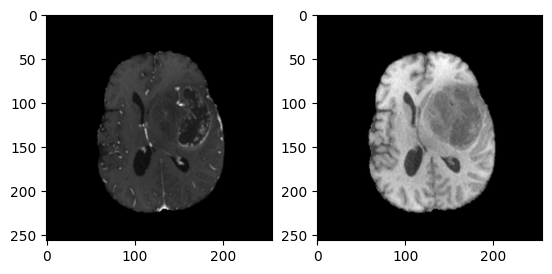

In [13]:
a = paired_dataset_train_shuffled.take(1)
a = list(a.as_numpy_iterator())
image_1 = a[0][0]
image_2 = a[0][1]
print(image_1.shape, image_2.shape)
plt.subplot(1,2,1)
plt.imshow(image_1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image_2, cmap='gray')
plt.show()


In [14]:
OUTPUT_CHANNELS = 1

In [15]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02,seed=42)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [16]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02,seed=42)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [17]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 1])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

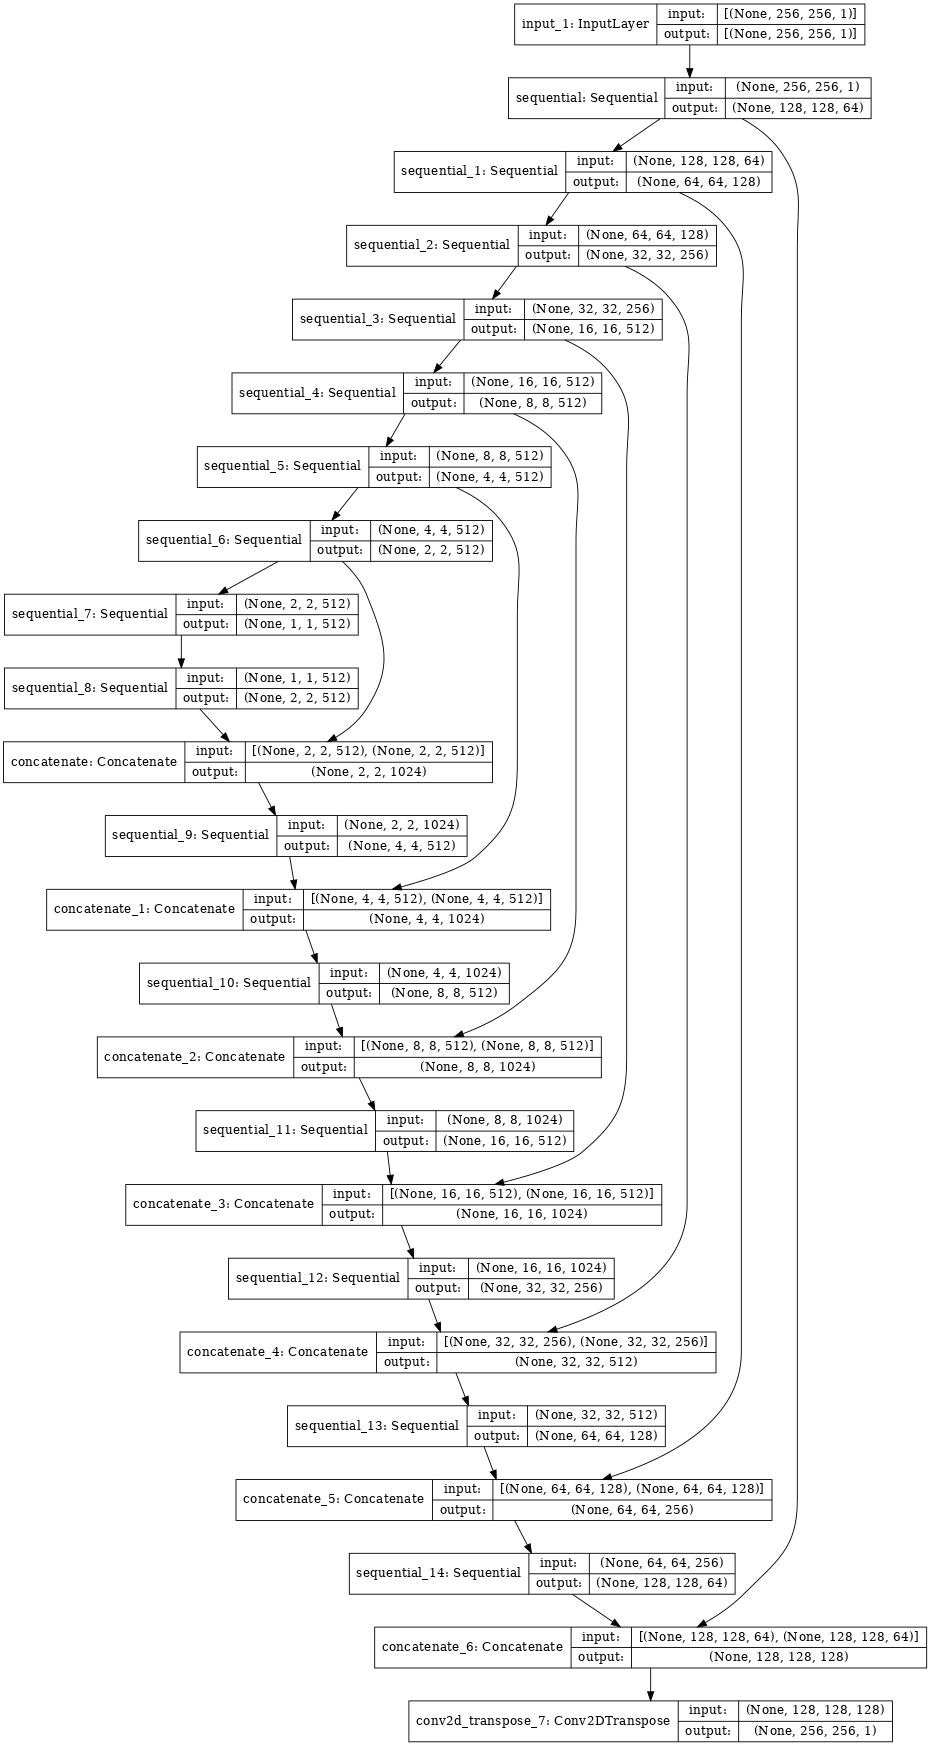

In [18]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

In [19]:
LAMBDA = 100

In [20]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [21]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [22]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02,seed=42)

  inp = tf.keras.layers.Input(shape=[256, 256, 1], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 1], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

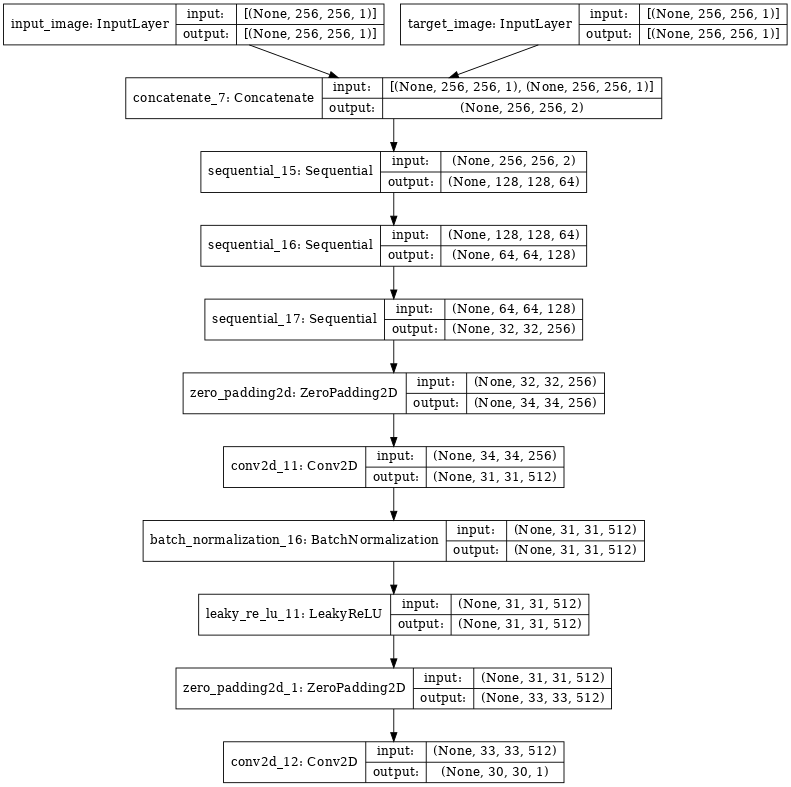

In [23]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

In [24]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [25]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

In [26]:
checkpoint_dir = './training_checkpoints_1'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
#checkpoint manager keep 3 last checkpoints
checkpoint_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)

In [27]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5,cmap='gray')
    plt.axis('off')
  plt.show()

2023-12-20 10:38:04.561775: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 131596288 exceeds 10% of free system memory.
2023-12-20 10:38:04.693216: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


(256, 256) (256, 256)


2023-12-20 10:38:07.976818: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


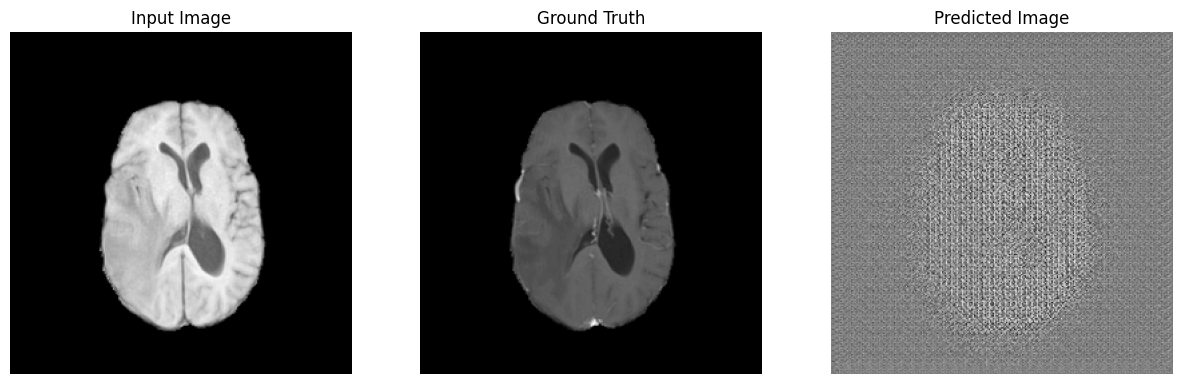

In [28]:
for example_input in paired_dataset_test_shuffled.take(1):
    image_1 = example_input[1]
    image_2 = example_input[0]
    print(image_1.shape, image_2.shape) 
    generate_images(generator, image_1[tf.newaxis,...,tf.newaxis], image_2[tf.newaxis,...,tf.newaxis])

In [29]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [31]:
@tf.function
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    
    gen_output = generator(input_image[tf.newaxis,...,tf.newaxis], training=True)

    disc_real_output = discriminator([input_image[tf.newaxis,...,tf.newaxis], target[tf.newaxis,...,tf.newaxis]], training=True)
    disc_generated_output = discriminator([input_image[tf.newaxis,...,tf.newaxis], gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

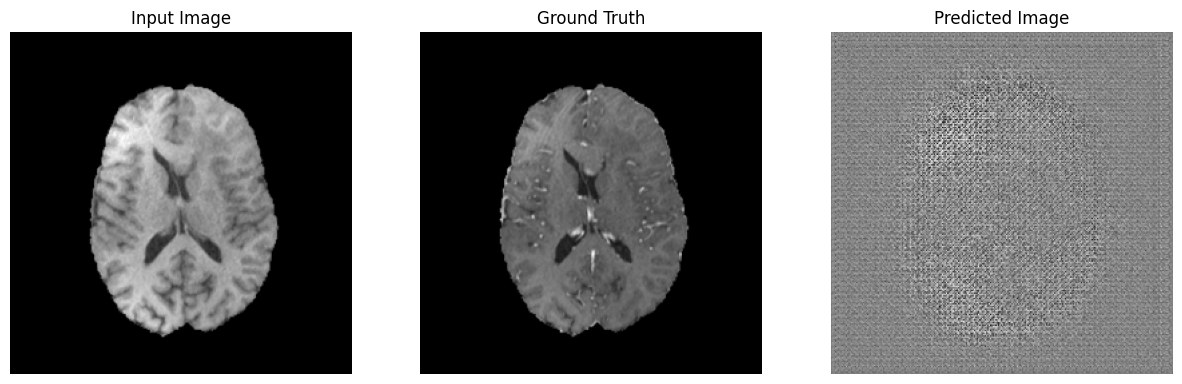

(2, 256, 256)
tf.Tensor(0, shape=(), dtype=int64)


In [32]:
a = next(iter(paired_dataset_train_shuffled.take(1)))
example_input = a[1]
example_target = a[0]
generate_images(generator, example_input[tf.newaxis,...,tf.newaxis], example_target[tf.newaxis,...,tf.newaxis])

for step, element in paired_dataset_train_shuffled.repeat().take(1000).enumerate():
    print(element.shape)
    print(step)
    break


In [34]:
def fit(train_ds, test_ds, steps):
  a = next(iter(test_ds.take(1)))
  example_input = a[1]
  example_target = a[0]
  start = time.time()

  for step, element in train_ds.repeat().take(steps).enumerate():
    input_image = element[1]
    target = element[0]
    
    if (step) % 1000 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input[tf.newaxis,...,tf.newaxis], example_target[tf.newaxis,...,tf.newaxis])
      print(f"Step: {step//1000}k")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 5000 == 0:
      checkpoint_manager.save()
      print ('Saving checkpoint for step {} at {}'.format(step+1,
                                                          checkpoint_dir))

Time taken for 1000 steps: 45.36 sec



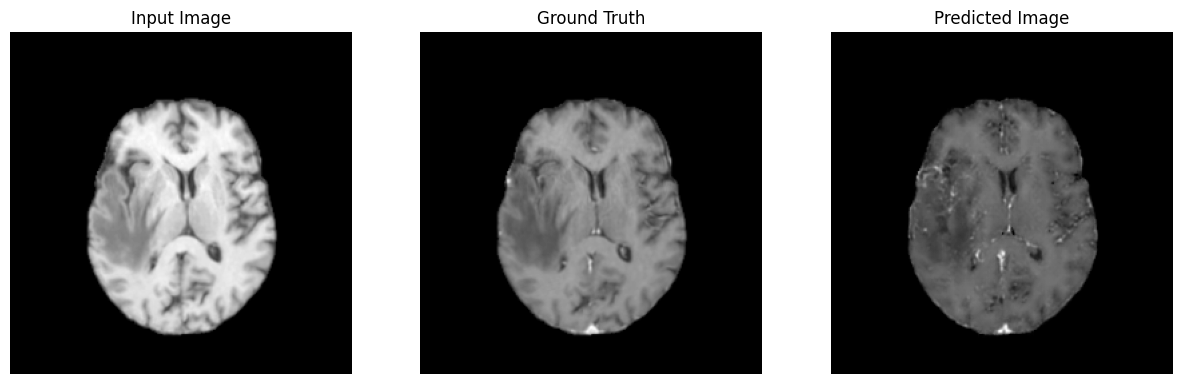

Step: 999k
....................................................................................................Saving checkpoint for step 1000000 at ./training_checkpoints_1


In [35]:
fit(paired_dataset_train_shuffled, paired_dataset_test_shuffled, steps=1000000)

In [29]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

(256, 256) (256, 256)


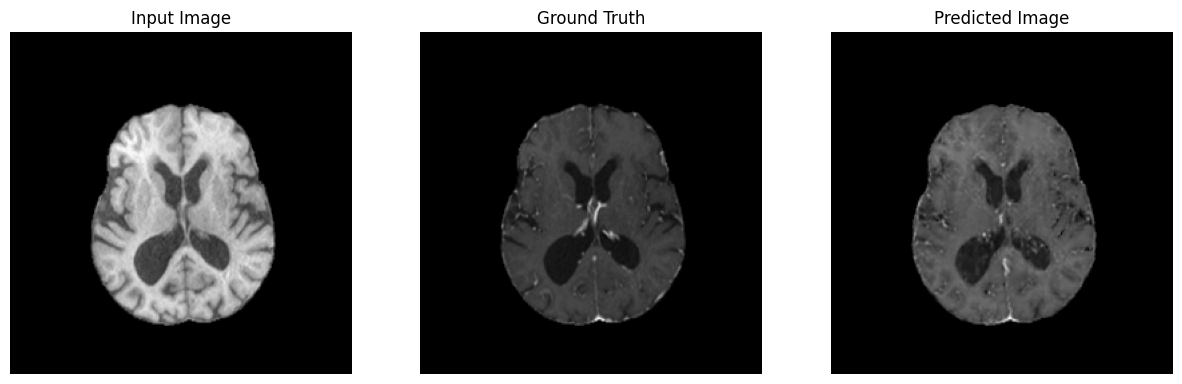

In [33]:
for element in paired_dataset_test_shuffled.take(1):
    inp = element[1]
    tar = element[0]
    print(inp.shape, tar.shape)
    generate_images(generator, inp[tf.newaxis,...,tf.newaxis], tar[tf.newaxis,...,tf.newaxis])

In [29]:
#restore the latest checkpoint in checkpoint_dir
checkpoint.restore(checkpoint_manager.latest_checkpoint)

In [46]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr

ssim_list = []
mse_list = []
psnr_list = []

for element in paired_dataset_test_shuffled:
    inp = element[1]
    tar = element[0]
    
    tar_np = tar.numpy()
    
    prediction = generator(inp[tf.newaxis, ..., tf.newaxis], training=True)
    prediction_np = prediction[0, :, :, 0].numpy()
    
    ssim_list.append(ssim(tar_np, prediction_np, data_range=2.0))
    mse_list.append(mean_squared_error(tar_np, prediction_np))
    psnr_list.append(psnr(tar_np, prediction_np))

print('ssim is:', np.mean(ssim_list))
print('mse is:', np.mean(mse_list))
print('psnr is:', np.mean(psnr_list))


ssim is: 0.8332150882465541
mse is: 0.014243291257382032
psnr is: 26.346758196077474
